In [1]:
# HPC
import netCDF4 as nc
import numpy as np
import xarray as xr

# Plotting
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter

# Paths and stuff
import os
import sys

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

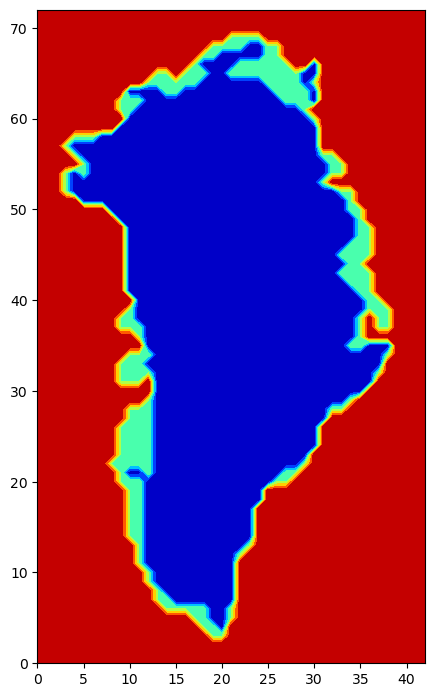

In [47]:
modelPath = '/scratch2/shreyas/results_19Mar2025/sicopolis_dirs/sicopolis_tuneCS_nouncert/sico_out/N_grl40_bm5_paleo17a_nudged_CT4_BH0_SVC_m21ka_pkp/'
ds_model = xr.open_dataset(modelPath + '0007.nc')

aspect_ratio = len(ds_model['x'])/len(ds_model['y'])
plt.rcParams["figure.figsize"] = (5, 5/aspect_ratio)
plt.contourf(ds_model["mask"].data)

In [40]:
modelPath = '/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/'
dataPath = '/scratch2/shreyas/GrIS_paleo_data/'

ds_tuneCS = xr.open_dataset("/scratch2/shreyas/results_19Mar2025/results/tuneCS/inexact_gn_hessian_cg/state_GNHessCG_iter_10.nc")
ds_tuneCS_1 = xr.open_dataset("/scratch2/shreyas/results_19Mar2025/results/tuneCS_1/inexact_gn_hessian_cg/state_GNHessCG_iter_10.nc")
ds_tuneCS_realistic = xr.open_dataset("/scratch2/shreyas/results_19Mar2025/results/tuneCS_realistic/inexact_gn_hessian_cg/state_GNHessCG_iter_8.nc")
ds_tuneCS_realistic_1 = xr.open_dataset("/scratch2/shreyas/results_19Mar2025/results/tuneCS_realistic_1/inexact_gn_hessian_cg/state_GNHessCG_iter_10.nc")
ds_tuneCS_smoother = xr.open_dataset("/scratch2/shreyas/results_19Mar2025/results/tuneCS_smoother/inexact_gn_hessian_cg/state_GNHessCG_iter_10.nc")
ds_tuneCS_smoother_1 = xr.open_dataset("/scratch2/shreyas/results_19Mar2025/results/tuneCS_smoother_1/inexact_gn_hessian_cg/state_GNHessCG_iter_10.nc")
ds_tuneCS_nouncert = xr.open_dataset("/scratch2/shreyas/results_19Mar2025/results/tuneCS_nouncert/inexact_gn_hessian_cg/state_GNHessCG_iter_10.nc")
ds_tuneCS_nouncert_1 = xr.open_dataset("/scratch2/shreyas/results_19Mar2025/results/tuneCS_nouncert_1/inexact_gn_hessian_cg/state_GNHessCG_iter_3.nc")

ds_surfvel_data_40km = xr.open_dataset(dataPath + 'surfvel_data_40kms.nc')
ds_surfvel_model_40km = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_nudged_CT4_BH0_m21ka_pkp/grl40_bm5_paleo17a_nudged_CT4_BH0_m21ka_pkp0007.nc')

vs_data = ds_surfvel_data_40km["vs"].data
vs_unc_data = ds_surfvel_data_40km['vs_uncert'].data
vs_unc_real_data = ds_surfvel_data_40km['vs_uncert_realistic'].data
vs_unc_real_smoother_data = ds_surfvel_data_40km['vs_uncert_realistic_smoother'].data
vs_unc_real_smoothest_data = ds_surfvel_data_40km['vs_uncert_realistic_smoothest'].data
vs_model = (ds_surfvel_model_40km['vx_s_g'].data**2 + ds_surfvel_model_40km['vy_s_g'].data**2)**0.5

costs = 0.5*(vs_data - vs_model)**2
cost = np.sum(costs)

costs_weighted = 0.5*(vs_data - vs_model)**2/vs_unc_data**2
cost_weighted = np.sum(costs_weighted)

costs_real_weighted = 0.5*(vs_data - vs_model)**2/vs_unc_real_data**2
cost_real_weighted = np.sum(costs_real_weighted)

costs_real_smoother_weighted = 0.5*(vs_data - vs_model)**2/vs_unc_real_smoother_data**2
cost_real_smoother_weighted = np.sum(costs_real_smoother_weighted)

/tmp/ipykernel_1474398/2616158174.py:51: UserWarning: The following kwargs were not used by contour: 'color'
  ax[2,0].contour(ds_surfvel_data_40km['x'],
/tmp/ipykernel_1474398/2616158174.py:54: UserWarning: The following kwargs were not used by contour: 'color'
  ax[2,0].contour(ds_surfvel_data_40km['x'],
/tmp/ipykernel_1474398/2616158174.py:93: UserWarning: The following kwargs were not used by contour: 'color'
  ax[2,3].contour(ds_surfvel_data_40km['x'],
/tmp/ipykernel_1474398/2616158174.py:96: UserWarning: The following kwargs were not used by contour: 'color'
  ax[2,3].contour(ds_surfvel_data_40km['x'],
/tmp/ipykernel_1474398/2616158174.py:105: UserWarning: The following kwargs were not used by contour: 'color'
  ax[3,3].contour(ds_surfvel_data_40km['x'],
/tmp/ipykernel_1474398/2616158174.py:108: UserWarning: The following kwargs were not used by contour: 'color'
  ax[3,3].contour(ds_surfvel_data_40km['x'],


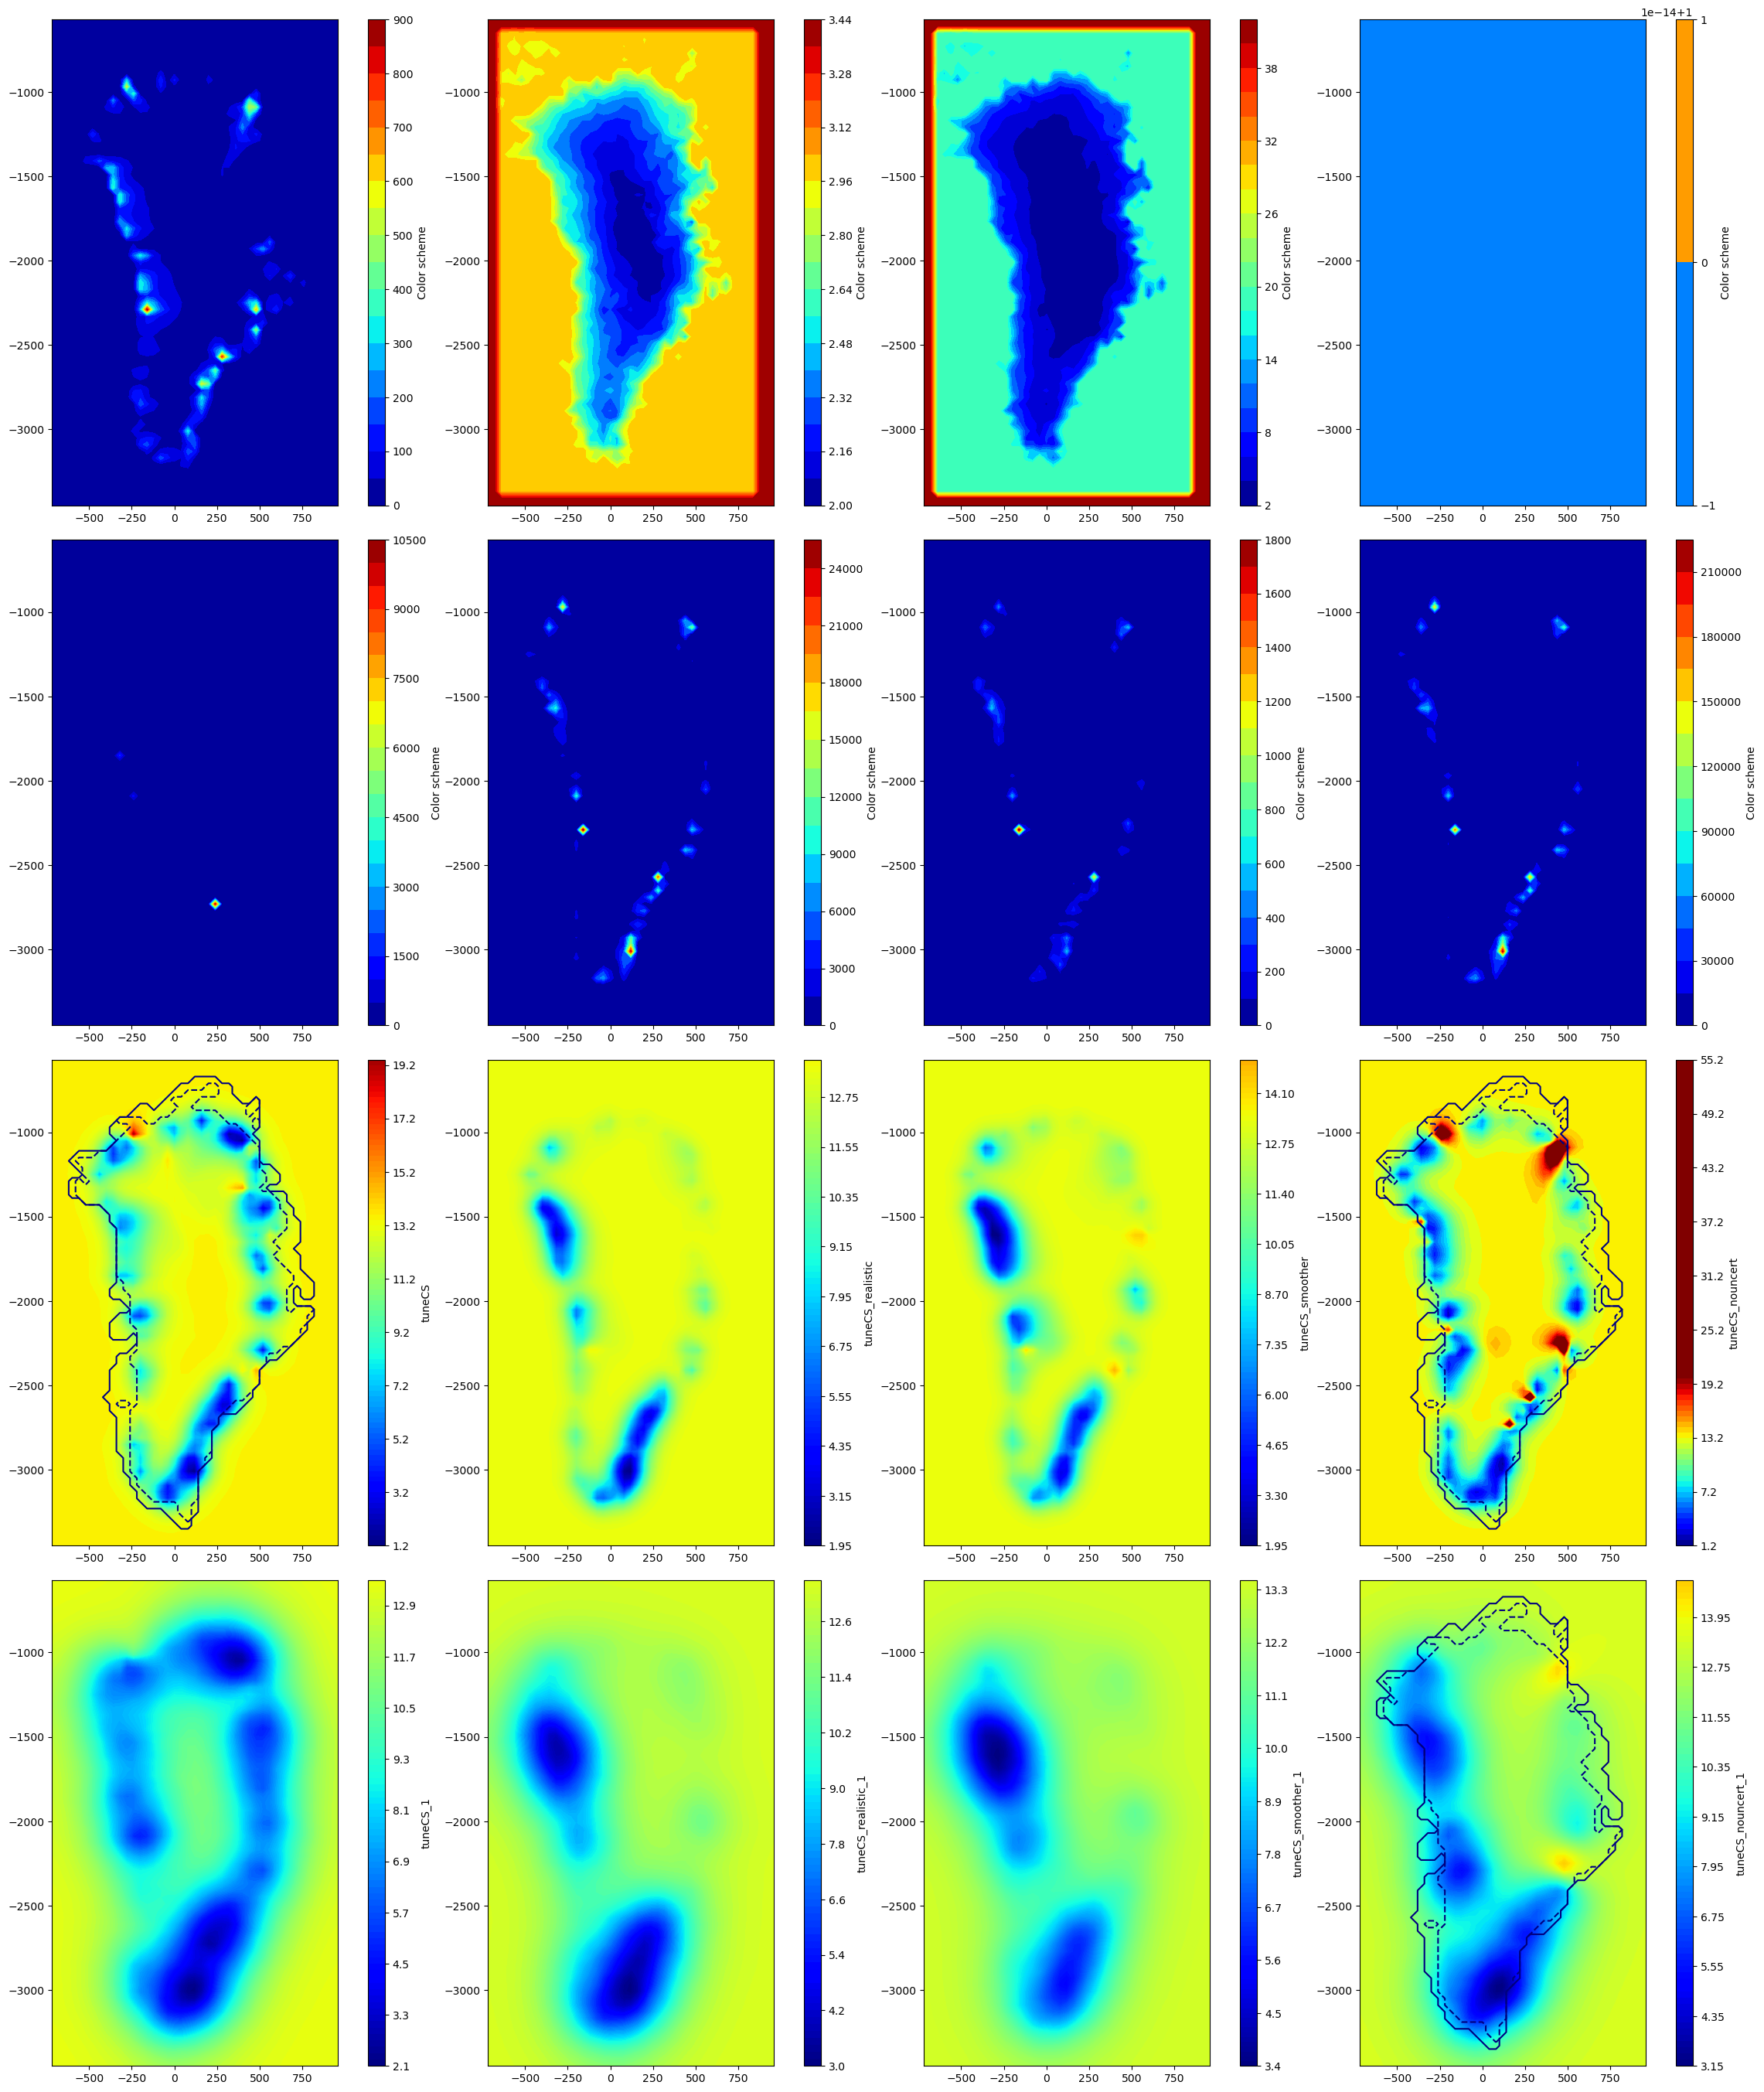

In [42]:
n_rows, n_cols = 4, 4
aspect_ratio = len(ds_tuneCS['x'])/len(ds_tuneCS['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.7)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vs_unc_data,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0, 0])

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vs_unc_real_data,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0, 1])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vs_unc_real_smoother_data,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0, 2])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vs_unc_data*0.0 + 1.0,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0, 3])

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_weighted,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1, 0])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_real_weighted,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1, 1])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_real_smoother_weighted,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1, 2])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1, 3])

fancyPlotter.plot_normal(ds_tuneCS['x'], ds_tuneCS['y'], 
                         10**ds_tuneCS["xx_c_slide_init"],
                         cmap = 'jet',
                         fig = fig, ax = ax[2,0], vmax = 20,
                         cbar_label = 'tuneCS')
ax[2,0].contour(ds_surfvel_data_40km['x'], 
                ds_surfvel_data_40km['y'],
                mask_land, levels=[0], color="black")
ax[2,0].contour(ds_surfvel_data_40km['x'], 
                ds_surfvel_data_40km['y'],
                mask_ice, levels=[0], color="black", linestyles = "dashed")

fancyPlotter.plot_normal(ds_tuneCS_1['x'], ds_tuneCS_1['y'], 
                         10**ds_tuneCS_1["xx_c_slide_init"],
                         cmap = 'jet',
                         fig = fig, ax = ax[3,0], vmax = 20,
                         cbar_label = 'tuneCS_1')

fancyPlotter.plot_normal(ds_tuneCS_realistic['x'], ds_tuneCS_realistic['y'], 
                         10**ds_tuneCS_realistic["xx_c_slide_init"],
                         cmap = 'jet',
                         fig = fig, ax = ax[2,1], vmax = 20,
                         cbar_label = 'tuneCS_realistic')

fancyPlotter.plot_normal(ds_tuneCS_realistic_1['x'], ds_tuneCS_realistic_1['y'], 
                         10**ds_tuneCS_realistic_1["xx_c_slide_init"],
                         cmap = 'jet',
                         fig = fig, ax = ax[3,1], vmax = 20,
                         cbar_label = 'tuneCS_realistic_1')

fancyPlotter.plot_normal(ds_tuneCS_smoother['x'], ds_tuneCS_smoother['y'], 
                         10**ds_tuneCS_smoother["xx_c_slide_init"],
                         cmap = 'jet',
                         fig = fig, ax = ax[2,2], vmax = 20,
                         cbar_label = 'tuneCS_smoother')

fancyPlotter.plot_normal(ds_tuneCS_smoother_1['x'], ds_tuneCS_smoother_1['y'], 
                         10**ds_tuneCS_smoother_1["xx_c_slide_init"],
                         cmap = 'jet',
                         fig = fig, ax = ax[3,2], vmax = 20,
                         cbar_label = 'tuneCS_smoother_1')

fancyPlotter.plot_normal(ds_tuneCS_nouncert['x'], ds_tuneCS_nouncert['y'], 
                         10**ds_tuneCS_nouncert["xx_c_slide_init"],
                         cmap = 'jet',
                         fig = fig, ax = ax[2,3], vmax = 20,
                         cbar_label = 'tuneCS_nouncert')
ax[2,3].contour(ds_surfvel_data_40km['x'], 
                ds_surfvel_data_40km['y'],
                mask_land, levels=[0], color="black")
ax[2,3].contour(ds_surfvel_data_40km['x'], 
                ds_surfvel_data_40km['y'],
                mask_ice, levels=[0], color="black", linestyles = "dashed")

fancyPlotter.plot_normal(ds_tuneCS_nouncert_1['x'], ds_tuneCS_nouncert_1['y'], 
                         10**ds_tuneCS_nouncert_1["xx_c_slide_init"],
                         cmap = 'jet',
                         fig = fig, ax = ax[3,3], vmax = 20,
                         cbar_label = 'tuneCS_nouncert_1')
ax[3,3].contour(ds_surfvel_data_40km['x'], 
                ds_surfvel_data_40km['y'],
                mask_land, levels=[0], color="black")
ax[3,3].contour(ds_surfvel_data_40km['x'], 
                ds_surfvel_data_40km['y'],
                mask_ice, levels=[0], color="black", linestyles = "dashed")

plt.tight_layout()